In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest,chi2

In [7]:
data = pd.read_csv("train.csv")
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
X = data.iloc[:,:20]
y = data.iloc[:,-1]
print(y.head())
X.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


# Univariate feature selection


## SelectKbest or SelectPercentile

These objects take as input a scoring function that returns univariate scores and p-values (or only scores for SelectKBest and SelectPercentile):

1. For regression: r_regression, f_regression, mutual_info_regression
2. For classification: chi2, f_classif, mutual_info_classif

The methods based on F-test estimate the degree of linear dependency between two random variables. On the other hand, mutual information methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation. Note that the 
-test should only be applied to non-negative features, such as frequencies.

## Feature selection with sparse data

If you use sparse data (i.e. data represented as sparse matrices), chi2, mutual_info_regression, mutual_info_classif will deal with the data without making it dense

## Note : Don't use regression score fucntion to classification. Results will be useless.

In [11]:
best_fea = SelectKBest(score_func=chi2,k=10)
fit = best_fea.fit(X,y)
df_score = pd.DataFrame(fit.scores_)
df_cols = pd.DataFrame(X.columns)

In [13]:
featurescores = pd.concat([df_cols,df_score],axis=1)
featurescores.columns = ['specs','score']
featurescores.nlargest(10,'score')

,specs,score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


# Tree based Estimator 

Tree-based estimators (see the sklearn.tree module and forest of trees in the sklearn.ensemble module) can be used to compute impurity-based feature importances, which in turn can be used to discard irrelevant features (when coupled with the SelectFromModel meta-transformer):

[0.05946767 0.02057955 0.03318445 0.01986282 0.03304147 0.01671749
 0.03523541 0.03249628 0.0370508  0.03395102 0.03380938 0.04742821
 0.04803309 0.39102557 0.03511079 0.03407836 0.03506049 0.01458992
 0.01908315 0.02019409]


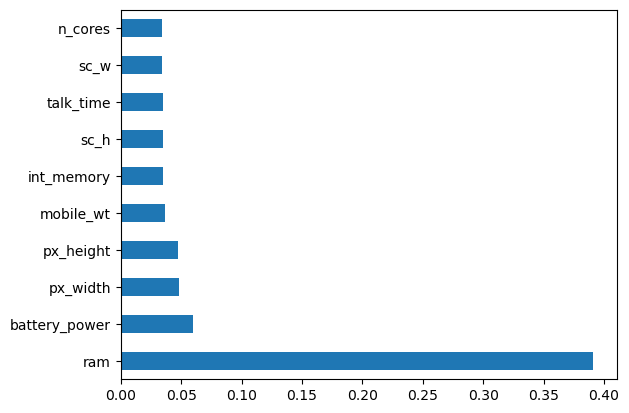

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
fe_imp = pd.Series(model.feature_importances_,index= X.columns)
fe_imp.nlargest(10).plot(kind='barh')
plt.show()

# Correlation Matrix with Heatmap

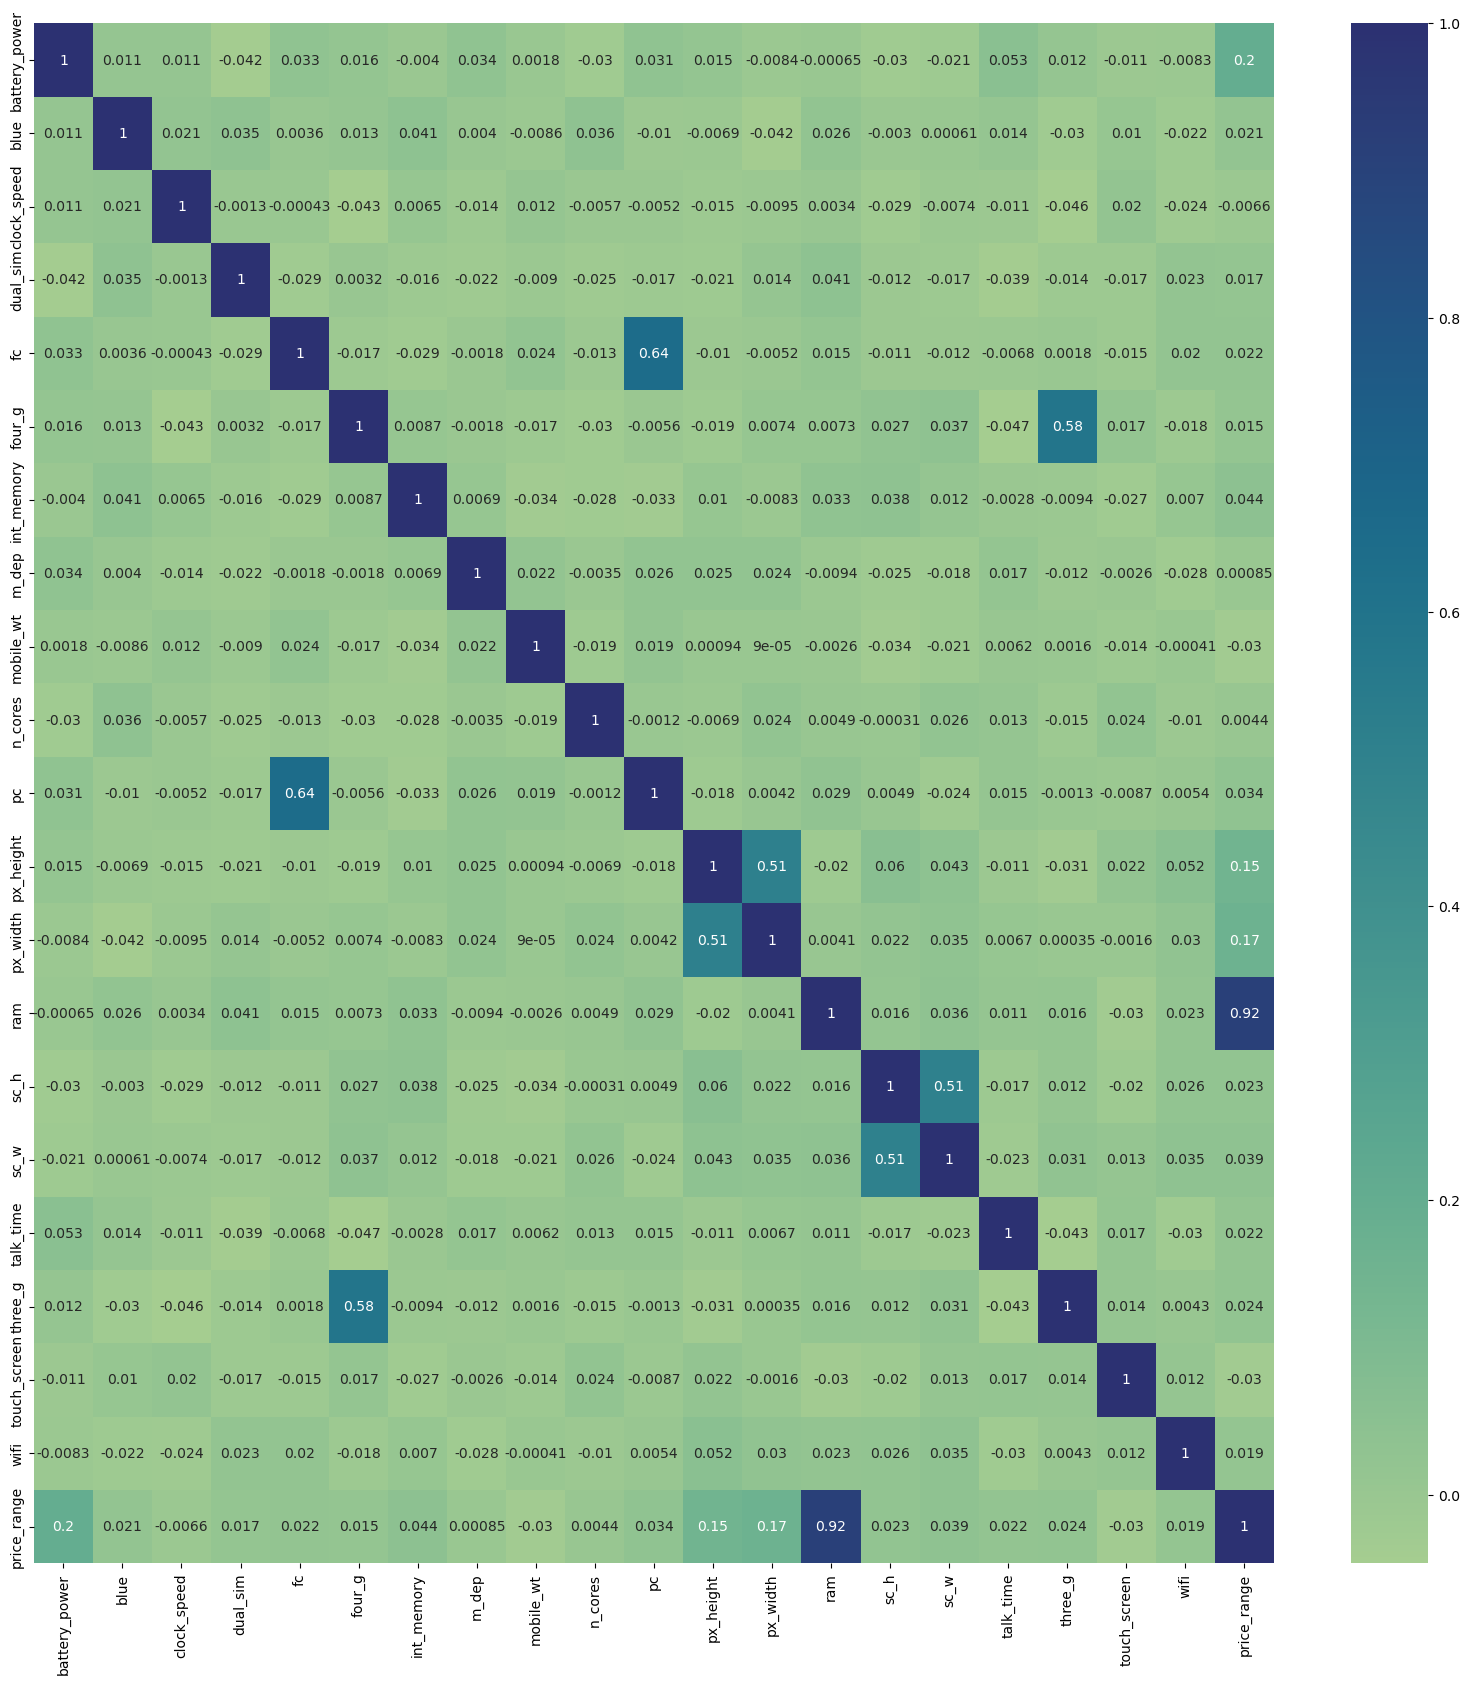

In [22]:
import seaborn as sns
corrmat = data.corr()
top_features = corrmat.index
plt.figure(figsize = (20,20))
g = sns.heatmap(data[top_features].corr(),annot = True,cmap ='crest')

# More Methods:

1. VarianceThreshold
2. Recursive feature elimination - RFE
3. L1-based feature selection - Lasso for regression, and of LogisticRegression and LinearSVC for classification
4. Feature selection as part of a pipeline

clf = Pipeline([('feature_selection', SelectFromModel(LinearSVC(dual="auto", penalty="l1"))),('classification', RandomForestClassifier())])
clf.fit(X, y)